In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Datasets/train.csv')

In [3]:
df

,MAGIC_KEY,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,LAST_PURCHASE_DATE,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,MODE_BOX_ID,T_PURCHASE_10_2018_FIRST_15,T_PURCHASE_11_2018_FIRST_15,T_PURCHASE_12_2018_FIRST_15,T_PURCHASE_1_2019_FIRST_15,MODE_BOX_ID_10_2018_FIRST_15,MODE_BOX_ID_11_2018_FIRST_15,MODE_BOX_ID_12_2018_FIRST_15,MODE_BOX_ID_1_2019_FIRST_15
0,249670911D8,1,13.96,2018-11-01,92 days,0 days 00:00:00,0,1,0,0,245.0,0.0,1.0,0.0,0.0,245.0,245.0,245.0,245.0
1,249751FC4DD,1,17.98,2018-10-12,112 days,0 days 00:00:00,1,0,0,0,260.0,1.0,0.0,0.0,0.0,260.0,260.0,260.0,260.0
2,24978027606,1,15.96,2018-10-19,105 days,0 days 00:00:00,0,0,0,0,27.0,0.0,0.0,0.0,0.0,27.0,27.0,27.0,27.0
3,24979164422,1,13.96,2018-11-30,63 days,0 days 00:00:00,0,0,0,0,246.0,0.0,0.0,0.0,0.0,246.0,246.0,246.0,246.0
4,2497B8B4FDA,2,33.94,2018-11-01,92 days,29 days 00:00:00,1,1,0,0,255.0,1.0,1.0,0.0,0.0,260.0,255.0,255.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048931,2E6F53ECC13,1,19.98,2018-11-25,68 days,0 days 00:00:00,0,0,0,0,131.0,0.0,0.0,0.0,0.0,131.0,131.0,131.0,131.0
1048932,2E6F6DAFFF3,4,71.92,2019-01-19,13 days,30 days 16:00:00,0,0,0,0,258.0,0.0,0.0,0.0,0.0,258.0,258.0,258.0,258.0
1048933,2E6F72C6F1C,1,19.98,2018-10-21,103 days,0 days 00:00:00,0,0,0,0,134.0,0.0,0.0,0.0,0.0,134.0,134.0,134.0,134.0
1048934,2E6F9C7B9B4,1,19.98,2019-01-28,4 days,0 days 00:00:00,0,0,0,0,144.0,0.0,0.0,0.0,0.0,144.0,144.0,144.0,144.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048936 entries, 0 to 1048935
Data columns (total 19 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   MAGIC_KEY                     1048936 non-null  object 
 1   PURCHASE_COUNT                1048936 non-null  int64  
 2   TOTAL_AMOUNT_SPENT            1048936 non-null  float64
 3   LAST_PURCHASE_DATE            1048936 non-null  object 
 4   DAY_SINCE_LAST_PURCHASE       1048936 non-null  object 
 5   AVERAGE_DIFF                  1048936 non-null  object 
 6   10_2018_FIRST_15              1048936 non-null  int64  
 7   11_2018_FIRST_15              1048936 non-null  int64  
 8   12_2018_FIRST_15              1048936 non-null  int64  
 9   1_2019_FIRST_15               1048936 non-null  int64  
 10  MODE_BOX_ID                   1048936 non-null  float64
 11  T_PURCHASE_10_2018_FIRST_15   1048936 non-null  float64
 12  T_PURCHASE_11_2018_FIRST_15 

In [5]:
df['LAST_PURCHASE_DATE'] = pd.to_datetime(df['LAST_PURCHASE_DATE'])
df['DAY_SINCE_LAST_PURCHASE'] = pd.to_timedelta(df['DAY_SINCE_LAST_PURCHASE'])
df['AVERAGE_DIFF'] = pd.to_timedelta(df['AVERAGE_DIFF'])

In [6]:
df['DAY_SINCE_LAST_PURCHASE'] = df['DAY_SINCE_LAST_PURCHASE'].dt.days.astype(int)
df['AVERAGE_DIFF'] = df['AVERAGE_DIFF'].dt.days.astype(int)

In [7]:
df.drop(columns=['LAST_PURCHASE_DATE'], inplace=True)

In [8]:
df.head()

,MAGIC_KEY,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,MODE_BOX_ID,T_PURCHASE_10_2018_FIRST_15,T_PURCHASE_11_2018_FIRST_15,T_PURCHASE_12_2018_FIRST_15,T_PURCHASE_1_2019_FIRST_15,MODE_BOX_ID_10_2018_FIRST_15,MODE_BOX_ID_11_2018_FIRST_15,MODE_BOX_ID_12_2018_FIRST_15,MODE_BOX_ID_1_2019_FIRST_15
0,249670911D8,1,13.96,92,0,0,1,0,0,245.0,0.0,1.0,0.0,0.0,245.0,245.0,245.0,245.0
1,249751FC4DD,1,17.98,112,0,1,0,0,0,260.0,1.0,0.0,0.0,0.0,260.0,260.0,260.0,260.0
2,24978027606,1,15.96,105,0,0,0,0,0,27.0,0.0,0.0,0.0,0.0,27.0,27.0,27.0,27.0
3,24979164422,1,13.96,63,0,0,0,0,0,246.0,0.0,0.0,0.0,0.0,246.0,246.0,246.0,246.0
4,2497B8B4FDA,2,33.94,92,29,1,1,0,0,255.0,1.0,1.0,0.0,0.0,260.0,255.0,255.0,255.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048936 entries, 0 to 1048935
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   MAGIC_KEY                     1048936 non-null  object 
 1   PURCHASE_COUNT                1048936 non-null  int64  
 2   TOTAL_AMOUNT_SPENT            1048936 non-null  float64
 3   DAY_SINCE_LAST_PURCHASE       1048936 non-null  int32  
 4   AVERAGE_DIFF                  1048936 non-null  int32  
 5   10_2018_FIRST_15              1048936 non-null  int64  
 6   11_2018_FIRST_15              1048936 non-null  int64  
 7   12_2018_FIRST_15              1048936 non-null  int64  
 8   1_2019_FIRST_15               1048936 non-null  int64  
 9   MODE_BOX_ID                   1048936 non-null  float64
 10  T_PURCHASE_10_2018_FIRST_15   1048936 non-null  float64
 11  T_PURCHASE_11_2018_FIRST_15   1048936 non-null  float64
 12  T_PURCHASE_12_2018_FIRST_15 

In [10]:
from sklearn.preprocessing import LabelEncoder #importing the labenconder
le = LabelEncoder() #creating an instance of LabelEncoder

df['MAGIC_KEY_ENCODED'] = le.fit_transform(df['MAGIC_KEY'])
df_encoded = df.drop(columns = ['MAGIC_KEY'])

In [11]:
df_encoded.head()

,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,MODE_BOX_ID,T_PURCHASE_10_2018_FIRST_15,T_PURCHASE_11_2018_FIRST_15,T_PURCHASE_12_2018_FIRST_15,T_PURCHASE_1_2019_FIRST_15,MODE_BOX_ID_10_2018_FIRST_15,MODE_BOX_ID_11_2018_FIRST_15,MODE_BOX_ID_12_2018_FIRST_15,MODE_BOX_ID_1_2019_FIRST_15,MAGIC_KEY_ENCODED
0,1,13.96,92,0,0,1,0,0,245.0,0.0,1.0,0.0,0.0,245.0,245.0,245.0,245.0,0
1,1,17.98,112,0,1,0,0,0,260.0,1.0,0.0,0.0,0.0,260.0,260.0,260.0,260.0,1
2,1,15.96,105,0,0,0,0,0,27.0,0.0,0.0,0.0,0.0,27.0,27.0,27.0,27.0,2
3,1,13.96,63,0,0,0,0,0,246.0,0.0,0.0,0.0,0.0,246.0,246.0,246.0,246.0,3
4,2,33.94,92,29,1,1,0,0,255.0,1.0,1.0,0.0,0.0,260.0,255.0,255.0,255.0,4


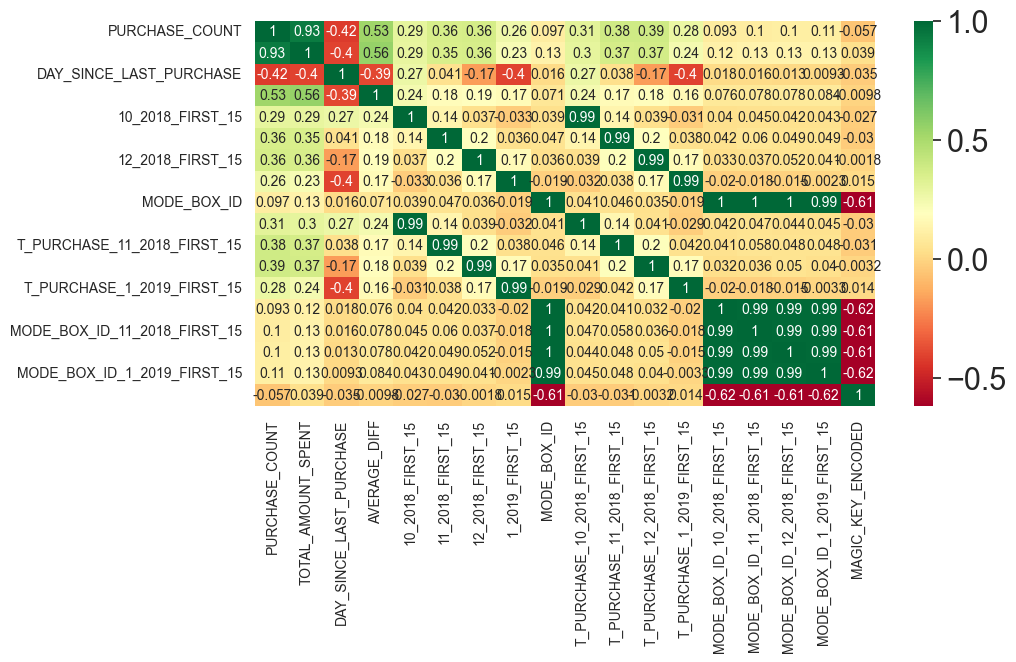

In [12]:
sns.set(font_scale = 2)
plt.subplots(figsize = (10, 5))
heat_plot = sns.heatmap(df_encoded.corr(method = 'pearson'), annot = True, cmap = 'RdYlGn', annot_kws={'size': 10})

plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)

plt.show()

In [13]:
correlation = df_encoded.corr(method = 'pearson') #finding all correlation between each features
print(correlation['MODE_BOX_ID_1_2019_FIRST_15'].sort_values(ascending = False).to_string()) #printing correlation with class in descending order

MODE_BOX_ID_1_2019_FIRST_15     1.000000
MODE_BOX_ID                     0.993863
MODE_BOX_ID_12_2018_FIRST_15    0.991027
MODE_BOX_ID_11_2018_FIRST_15    0.990544
MODE_BOX_ID_10_2018_FIRST_15    0.989921
TOTAL_AMOUNT_SPENT              0.133430
PURCHASE_COUNT                  0.105687
AVERAGE_DIFF                    0.083577
11_2018_FIRST_15                0.049148
T_PURCHASE_11_2018_FIRST_15     0.047966
T_PURCHASE_10_2018_FIRST_15     0.044709
10_2018_FIRST_15                0.042822
12_2018_FIRST_15                0.040993
T_PURCHASE_12_2018_FIRST_15     0.039924
DAY_SINCE_LAST_PURCHASE         0.009341
1_2019_FIRST_15                -0.002303
T_PURCHASE_1_2019_FIRST_15     -0.003292
MAGIC_KEY_ENCODED              -0.615271


In [14]:
from sklearn.utils import shuffle #importing the suffle module
shuffled_df = shuffle(df_encoded)
shuffled_df #checking

,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,MODE_BOX_ID,T_PURCHASE_10_2018_FIRST_15,T_PURCHASE_11_2018_FIRST_15,T_PURCHASE_12_2018_FIRST_15,T_PURCHASE_1_2019_FIRST_15,MODE_BOX_ID_10_2018_FIRST_15,MODE_BOX_ID_11_2018_FIRST_15,MODE_BOX_ID_12_2018_FIRST_15,MODE_BOX_ID_1_2019_FIRST_15,MAGIC_KEY_ENCODED
107449,1,19.98,22,0,0,0,0,1,268.0,0.0,0.0,0.0,1.0,268.0,268.0,268.0,268.0,107449
45000,1,15.96,17,0,0,0,0,1,255.0,0.0,0.0,0.0,1.0,255.0,255.0,255.0,255.0,45000
323097,1,19.98,12,0,0,0,0,0,133.0,0.0,0.0,0.0,0.0,133.0,133.0,133.0,133.0,323097
668227,1,15.98,120,0,1,0,0,0,118.0,1.0,0.0,0.0,0.0,118.0,118.0,118.0,118.0,668227
54021,2,33.94,98,17,1,0,0,0,253.0,1.0,0.0,0.0,0.0,260.0,253.0,253.0,253.0,54021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341274,1,15.98,119,0,1,0,0,0,118.0,1.0,0.0,0.0,0.0,118.0,118.0,118.0,118.0,341274
279114,1,10.14,32,0,0,0,0,0,231.0,0.0,0.0,0.0,0.0,231.0,231.0,231.0,231.0,279114
716011,1,23.98,28,0,0,0,0,1,162.0,0.0,0.0,0.0,1.0,162.0,162.0,162.0,162.0,716011
762287,3,47.90,15,43,0,0,1,0,3.0,0.0,0.0,1.0,0.0,3.0,3.0,29.0,3.0,762287


In [15]:
#rearranging the index value
rearranged_df = shuffled_df.reset_index(drop = True)
rearranged_df

,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,MODE_BOX_ID,T_PURCHASE_10_2018_FIRST_15,T_PURCHASE_11_2018_FIRST_15,T_PURCHASE_12_2018_FIRST_15,T_PURCHASE_1_2019_FIRST_15,MODE_BOX_ID_10_2018_FIRST_15,MODE_BOX_ID_11_2018_FIRST_15,MODE_BOX_ID_12_2018_FIRST_15,MODE_BOX_ID_1_2019_FIRST_15,MAGIC_KEY_ENCODED
0,1,19.98,22,0,0,0,0,1,268.0,0.0,0.0,0.0,1.0,268.0,268.0,268.0,268.0,107449
1,1,15.96,17,0,0,0,0,1,255.0,0.0,0.0,0.0,1.0,255.0,255.0,255.0,255.0,45000
2,1,19.98,12,0,0,0,0,0,133.0,0.0,0.0,0.0,0.0,133.0,133.0,133.0,133.0,323097
3,1,15.98,120,0,1,0,0,0,118.0,1.0,0.0,0.0,0.0,118.0,118.0,118.0,118.0,668227
4,2,33.94,98,17,1,0,0,0,253.0,1.0,0.0,0.0,0.0,260.0,253.0,253.0,253.0,54021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048931,1,15.98,119,0,1,0,0,0,118.0,1.0,0.0,0.0,0.0,118.0,118.0,118.0,118.0,341274
1048932,1,10.14,32,0,0,0,0,0,231.0,0.0,0.0,0.0,0.0,231.0,231.0,231.0,231.0,279114
1048933,1,23.98,28,0,0,0,0,1,162.0,0.0,0.0,0.0,1.0,162.0,162.0,162.0,162.0,716011
1048934,3,47.90,15,43,0,0,1,0,3.0,0.0,0.0,1.0,0.0,3.0,3.0,29.0,3.0,762287


In [16]:
X = rearranged_df.drop(columns = ['MODE_BOX_ID_1_2019_FIRST_15']) #dropping the class collumn to separate the feature
X

,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,MODE_BOX_ID,T_PURCHASE_10_2018_FIRST_15,T_PURCHASE_11_2018_FIRST_15,T_PURCHASE_12_2018_FIRST_15,T_PURCHASE_1_2019_FIRST_15,MODE_BOX_ID_10_2018_FIRST_15,MODE_BOX_ID_11_2018_FIRST_15,MODE_BOX_ID_12_2018_FIRST_15,MAGIC_KEY_ENCODED
0,1,19.98,22,0,0,0,0,1,268.0,0.0,0.0,0.0,1.0,268.0,268.0,268.0,107449
1,1,15.96,17,0,0,0,0,1,255.0,0.0,0.0,0.0,1.0,255.0,255.0,255.0,45000
2,1,19.98,12,0,0,0,0,0,133.0,0.0,0.0,0.0,0.0,133.0,133.0,133.0,323097
3,1,15.98,120,0,1,0,0,0,118.0,1.0,0.0,0.0,0.0,118.0,118.0,118.0,668227
4,2,33.94,98,17,1,0,0,0,253.0,1.0,0.0,0.0,0.0,260.0,253.0,253.0,54021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048931,1,15.98,119,0,1,0,0,0,118.0,1.0,0.0,0.0,0.0,118.0,118.0,118.0,341274
1048932,1,10.14,32,0,0,0,0,0,231.0,0.0,0.0,0.0,0.0,231.0,231.0,231.0,279114
1048933,1,23.98,28,0,0,0,0,1,162.0,0.0,0.0,0.0,1.0,162.0,162.0,162.0,716011
1048934,3,47.90,15,43,0,0,1,0,3.0,0.0,0.0,1.0,0.0,3.0,3.0,29.0,762287


In [17]:
y =  rearranged_df['MODE_BOX_ID_1_2019_FIRST_15'] #separating target to y
y

0          268.0
1          255.0
2          133.0
3          118.0
4          253.0
           ...  
1048931    118.0
1048932    231.0
1048933    162.0
1048934      3.0
1048935    174.0
Name: MODE_BOX_ID_1_2019_FIRST_15, Length: 1048936, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split #importing module
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) #80-20% split

In [19]:
print(len(X_train)) #checking
print(len(X_test))

839148
209788


In [20]:
print(len(y_train)) #checking
print(len(y_test))

839148
209788


In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
tree_clf = DecisionTreeClassifier(max_depth = 17, random_state = 42)
tree_clf.fit(X, y)
tree_clf.feature_importances_

array([9.86846852e-04, 1.80781553e-02, 5.71989514e-03, 3.82897457e-03,
       1.65150170e-03, 1.79601995e-04, 3.09075706e-04, 1.44012446e-02,
       8.87879114e-01, 4.25252677e-04, 2.49109321e-04, 2.95785571e-04,
       5.30018169e-02, 5.89459724e-03, 2.51777628e-03, 2.17137056e-03,
       2.40988192e-03])

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
maxdepth = range(1, 31)
scores = []
for d in maxdepth:
    dt = DecisionTreeClassifier(max_depth = d, random_state = 42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

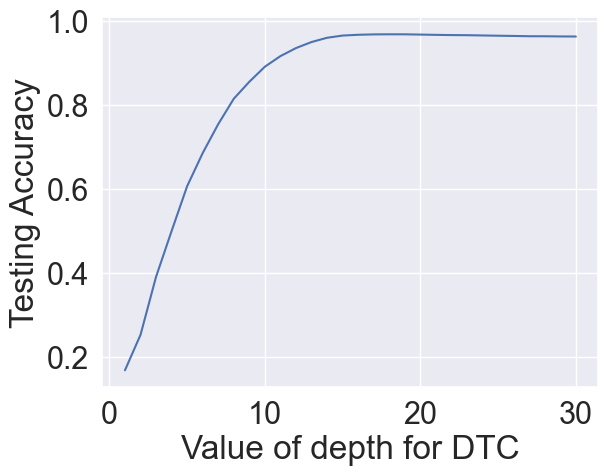

In [25]:
import matplotlib.pyplot as plt #importing marplotlib
#for showing inline
%matplotlib inline 


plt.plot(maxdepth, scores) #defining axis

plt.xlabel("Value of depth for DTC") #labeling the x-axis
plt.ylabel("Testing Accuracy") #labeling the y-axis

In [26]:
max(scores)

0.9684014338284364

In [27]:
scores.index(0.9684014338284364)

17

In [28]:
#creating instance of decision tree, depth 2
tree_clf = DecisionTreeClassifier(max_depth = 18, random_state = 42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=18, random_state=42)

In [29]:
y_pred = tree_clf.predict(X_test)

In [30]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9684014338284364

In [31]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50, criterion="entropy", random_state = 42, n_jobs = -1, max_leaf_nodes = 2**20, max_features = 20)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=20,
                       max_leaf_nodes=1048576, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [32]:
y_pred = classifier.predict(X_test)

In [33]:
metrics.accuracy_score(y_test, y_pred)

0.9695645127462009

In [34]:
df_feb = pd.read_csv('Datasets/test.csv')

In [35]:
df_feb

,MAGIC_KEY,BOX_ID
0,2C15B86534E,99.0
1,29D969045C2,238.0
2,29D969045C2,238.0
3,29D969045C2,238.0
4,29D969045C2,238.0
...,...,...
433952,2C26890A7CD,51.0
433953,2C26890A7CD,51.0
433954,2C26890A7CD,51.0
433955,28FE30D9AF3,246.0


In [36]:
df

,MAGIC_KEY,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,MODE_BOX_ID,T_PURCHASE_10_2018_FIRST_15,T_PURCHASE_11_2018_FIRST_15,T_PURCHASE_12_2018_FIRST_15,T_PURCHASE_1_2019_FIRST_15,MODE_BOX_ID_10_2018_FIRST_15,MODE_BOX_ID_11_2018_FIRST_15,MODE_BOX_ID_12_2018_FIRST_15,MODE_BOX_ID_1_2019_FIRST_15,MAGIC_KEY_ENCODED
0,249670911D8,1,13.96,92,0,0,1,0,0,245.0,0.0,1.0,0.0,0.0,245.0,245.0,245.0,245.0,0
1,249751FC4DD,1,17.98,112,0,1,0,0,0,260.0,1.0,0.0,0.0,0.0,260.0,260.0,260.0,260.0,1
2,24978027606,1,15.96,105,0,0,0,0,0,27.0,0.0,0.0,0.0,0.0,27.0,27.0,27.0,27.0,2
3,24979164422,1,13.96,63,0,0,0,0,0,246.0,0.0,0.0,0.0,0.0,246.0,246.0,246.0,246.0,3
4,2497B8B4FDA,2,33.94,92,29,1,1,0,0,255.0,1.0,1.0,0.0,0.0,260.0,255.0,255.0,255.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048931,2E6F53ECC13,1,19.98,68,0,0,0,0,0,131.0,0.0,0.0,0.0,0.0,131.0,131.0,131.0,131.0,1048931
1048932,2E6F6DAFFF3,4,71.92,13,30,0,0,0,0,258.0,0.0,0.0,0.0,0.0,258.0,258.0,258.0,258.0,1048932
1048933,2E6F72C6F1C,1,19.98,103,0,0,0,0,0,134.0,0.0,0.0,0.0,0.0,134.0,134.0,134.0,134.0,1048933
1048934,2E6F9C7B9B4,1,19.98,4,0,0,0,0,0,144.0,0.0,0.0,0.0,0.0,144.0,144.0,144.0,144.0,1048934


In [37]:
df_test = pd.merge(df_feb, df, on = 'MAGIC_KEY')
df_test

,MAGIC_KEY,BOX_ID,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,MODE_BOX_ID,T_PURCHASE_10_2018_FIRST_15,T_PURCHASE_11_2018_FIRST_15,T_PURCHASE_12_2018_FIRST_15,T_PURCHASE_1_2019_FIRST_15,MODE_BOX_ID_10_2018_FIRST_15,MODE_BOX_ID_11_2018_FIRST_15,MODE_BOX_ID_12_2018_FIRST_15,MODE_BOX_ID_1_2019_FIRST_15,MAGIC_KEY_ENCODED
0,2C15B86534E,99.0,1,11.96,43,0,0,0,0,0,78.0,0.0,0.0,0.0,0.0,78.0,78.0,78.0,78.0,526306
1,29D969045C2,238.0,5,63.90,23,21,1,1,0,1,238.0,1.0,1.0,0.0,1.0,238.0,238.0,238.0,238.0,268360
2,29D969045C2,238.0,5,63.90,23,21,1,1,0,1,238.0,1.0,1.0,0.0,1.0,238.0,238.0,238.0,238.0,268360
3,29D969045C2,238.0,5,63.90,23,21,1,1,0,1,238.0,1.0,1.0,0.0,1.0,238.0,238.0,238.0,238.0,268360
4,29D969045C2,238.0,5,63.90,23,21,1,1,0,1,238.0,1.0,1.0,0.0,1.0,238.0,238.0,238.0,238.0,268360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433952,2C26890A7CD,51.0,4,87.92,4,30,0,0,0,0,174.0,0.0,0.0,0.0,0.0,174.0,174.0,174.0,174.0,565276
433953,2C26890A7CD,51.0,4,87.92,4,30,0,0,0,0,174.0,0.0,0.0,0.0,0.0,174.0,174.0,174.0,174.0,565276
433954,2C26890A7CD,51.0,4,87.92,4,30,0,0,0,0,174.0,0.0,0.0,0.0,0.0,174.0,174.0,174.0,174.0,565276
433955,28FE30D9AF3,246.0,2,27.92,14,30,0,0,0,0,246.0,0.0,0.0,0.0,0.0,246.0,246.0,246.0,246.0,123923


In [38]:
df_test = df_test.drop(columns = ['MAGIC_KEY'])
df_test = df_test.drop(columns = ['MODE_BOX_ID_1_2019_FIRST_15'])
df_test

,BOX_ID,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,MODE_BOX_ID,T_PURCHASE_10_2018_FIRST_15,T_PURCHASE_11_2018_FIRST_15,T_PURCHASE_12_2018_FIRST_15,T_PURCHASE_1_2019_FIRST_15,MODE_BOX_ID_10_2018_FIRST_15,MODE_BOX_ID_11_2018_FIRST_15,MODE_BOX_ID_12_2018_FIRST_15,MAGIC_KEY_ENCODED
0,99.0,1,11.96,43,0,0,0,0,0,78.0,0.0,0.0,0.0,0.0,78.0,78.0,78.0,526306
1,238.0,5,63.90,23,21,1,1,0,1,238.0,1.0,1.0,0.0,1.0,238.0,238.0,238.0,268360
2,238.0,5,63.90,23,21,1,1,0,1,238.0,1.0,1.0,0.0,1.0,238.0,238.0,238.0,268360
3,238.0,5,63.90,23,21,1,1,0,1,238.0,1.0,1.0,0.0,1.0,238.0,238.0,238.0,268360
4,238.0,5,63.90,23,21,1,1,0,1,238.0,1.0,1.0,0.0,1.0,238.0,238.0,238.0,268360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433952,51.0,4,87.92,4,30,0,0,0,0,174.0,0.0,0.0,0.0,0.0,174.0,174.0,174.0,565276
433953,51.0,4,87.92,4,30,0,0,0,0,174.0,0.0,0.0,0.0,0.0,174.0,174.0,174.0,565276
433954,51.0,4,87.92,4,30,0,0,0,0,174.0,0.0,0.0,0.0,0.0,174.0,174.0,174.0,565276
433955,246.0,2,27.92,14,30,0,0,0,0,246.0,0.0,0.0,0.0,0.0,246.0,246.0,246.0,123923


In [39]:
df_test_X = df_test.drop(columns = ['BOX_ID'])
df_test_X

,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,MODE_BOX_ID,T_PURCHASE_10_2018_FIRST_15,T_PURCHASE_11_2018_FIRST_15,T_PURCHASE_12_2018_FIRST_15,T_PURCHASE_1_2019_FIRST_15,MODE_BOX_ID_10_2018_FIRST_15,MODE_BOX_ID_11_2018_FIRST_15,MODE_BOX_ID_12_2018_FIRST_15,MAGIC_KEY_ENCODED
0,1,11.96,43,0,0,0,0,0,78.0,0.0,0.0,0.0,0.0,78.0,78.0,78.0,526306
1,5,63.90,23,21,1,1,0,1,238.0,1.0,1.0,0.0,1.0,238.0,238.0,238.0,268360
2,5,63.90,23,21,1,1,0,1,238.0,1.0,1.0,0.0,1.0,238.0,238.0,238.0,268360
3,5,63.90,23,21,1,1,0,1,238.0,1.0,1.0,0.0,1.0,238.0,238.0,238.0,268360
4,5,63.90,23,21,1,1,0,1,238.0,1.0,1.0,0.0,1.0,238.0,238.0,238.0,268360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433952,4,87.92,4,30,0,0,0,0,174.0,0.0,0.0,0.0,0.0,174.0,174.0,174.0,565276
433953,4,87.92,4,30,0,0,0,0,174.0,0.0,0.0,0.0,0.0,174.0,174.0,174.0,565276
433954,4,87.92,4,30,0,0,0,0,174.0,0.0,0.0,0.0,0.0,174.0,174.0,174.0,565276
433955,2,27.92,14,30,0,0,0,0,246.0,0.0,0.0,0.0,0.0,246.0,246.0,246.0,123923


In [40]:
df_test_y = df_test['BOX_ID']
df_test_y

0          99.0
1         238.0
2         238.0
3         238.0
4         238.0
          ...  
433952     51.0
433953     51.0
433954     51.0
433955    246.0
433956    246.0
Name: BOX_ID, Length: 433957, dtype: float64

In [41]:
y_pred = tree_clf.predict(df_test_X)
y_pred

array([ 78., 238., 238., ..., 174., 246., 246.])

In [42]:
metrics.accuracy_score(df_test_y, y_pred)

0.44102295849588785

In [43]:
y_pred = classifier.predict(df_test_X)
y_pred

array([ 78., 238., 238., ..., 174., 246., 246.])

In [44]:
metrics.accuracy_score(df_test_y, y_pred)

0.45018515659385605